# Geopandas tutorial

Installing geopandas is tricky. In a terminal run the following:

    conda create -n geo_env                                      
    conda activate geo_env
    conda config --env --add channels conda-forge 
    config --env --set channel_priority strict
    conda install python=3 geopandas pandapower plotly matplotlib descasrtes ipykernel
    ipython kernel install --name geo_env --user

Load up jupyter lab.
In the right hand corner, select the geo_env kernel.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

Display a map of the world.
See https://geopandas.org/mapping.html

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Notice the column geometry - that is where the map components are stored.
print(world.head)

<bound method NDFrame.head of        pop_est      continent                      name iso_a3  gdp_md_est  \
0       920938        Oceania                      Fiji    FJI      8374.0   
1     53950935         Africa                  Tanzania    TZA    150600.0   
2       603253         Africa                 W. Sahara    ESH       906.5   
3     35623680  North America                    Canada    CAN   1674000.0   
4    326625791  North America  United States of America    USA  18560000.0   
..         ...            ...                       ...    ...         ...   
172    7111024         Europe                    Serbia    SRB    101800.0   
173     642550         Europe                Montenegro    MNE     10610.0   
174    1895250         Europe                    Kosovo    -99     18490.0   
175    1218208  North America       Trinidad and Tobago    TTO     43570.0   
176   13026129         Africa                  S. Sudan    SSD     20880.0   

                                 

In [3]:
# Determine the cordinate reference system.
# For more info look at https://kodu.ut.ee/~kmoch/geopython2018/lessons/L2/projections.html

world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

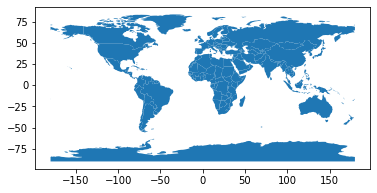

In [16]:
# Plot a world map
world.plot()

<AxesSubplot:>

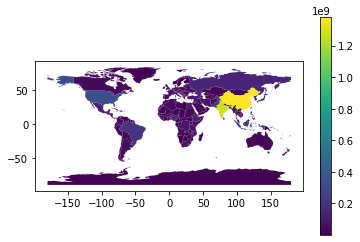

In [18]:
# Plot a choropleth of the world population with a legend
world.plot(column='pop_est', legend=True)

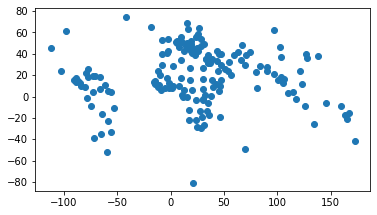

In [25]:
# Draw a map with the cetroids of each country.
# See https://geopandas.org/data_structures.html

wld = world.to_crs("EPSG:4326")
wld['centroid'] = wld.geometry.apply(lambda o: o.centroid)
wld = wld.set_geometry('centroid')

wld.plot()

## Create your own geo dataframe

<AxesSubplot:>

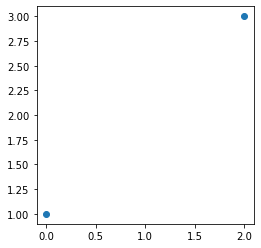

In [37]:
# Create and plot  data frame of two points at (0,1) and (2,3) , crs="EPSG:4326"
# Read https://geopandas.org/reference/geopandas.GeoDataFrame.html
# Read https://shapely.readthedocs.io/en/stable/manual.html#introduction

from shapely.geometry import Point
d = {'col1': ['name1', 'name2'],
     'geometry': [Point(0,1), Point(2,3)]}

gdf = gpd.GeoDataFrame(d, crs='EPSG:4326')
gdf.plot()

In [ ]:
# Save the geodataframe to a shape file
# Read https://geopandas.org/io.html#writing-spatial-data

#gdf.to_file('gdf_test.shp')

In [ ]:
# Create a geodataframe representing the lines in the three bus problem
# Hint look at the pandas excercise.
TODO